# Building the Baseline:  Linear Regression Model

## Sklearn's Linear Regression Model
Firstly, I will build the initial linear regression baseline model using sklearn's Linear Regression class. My initial model will contain all 10 of the following housing features, with no modifications initially made to them:

1. Month sold
2. Number of bathrooms
3. Number of bedrooms
4. Living square footage
5. Lot square footage
6. Number of floors
7. Condition
8. Grade
9. Year built
10. Year renovated

In [90]:
# Import necessary modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import math

### Define the data frames

In [54]:
# Create df on Macbook
dc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
kc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Create df on PC
#dc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
#kc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Set up 'month column' and convert categorical features to category codes
dc_df['month'] = pd.to_datetime(dc_df['date']).dt.month
kc_df['month'] = pd.to_datetime(kc_df['date']).dt.month

dc_df["condition"] = dc_df["condition"].astype('category').cat.codes
kc_df["condition"] = kc_df["condition"].astype('category').cat.codes
dc_df["grade"] = dc_df["grade"].astype('category').cat.codes
kc_df["grade"] = kc_df["grade"].astype('category').cat.codes

dc_df = dc_df.drop(columns=['Unnamed: 0', 'date', 'location'])
kc_df = kc_df.drop(columns=['Unnamed: 0', 'date', 'location'])

In [60]:
# Scale data frame data

def scale_df(df):
    """Function that scales a data frame about the mean"""
    return df.iloc[:,:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


dc_df_scaled = scale_df(dc_df)
kc_df_scaled = scale_df(kc_df)

### Linear Regression Models: No Modifications

In [61]:
X_dc = dc_df.drop('price', axis = 1)
X_kc = kc_df.drop('price', axis = 1)

# Linear Regression models
lm_dc = ols('price ~ bathrooms + bedrooms + sqft_living + sqft_lot + floors + condition + grade + yr_built + yr_renovated + month',dc_df_scaled).fit()
lm_kc = ols('price ~ bathrooms + bedrooms + sqft_living + sqft_lot + floors + condition + grade + yr_built + yr_renovated + month',kc_df_scaled).fit()

# # Linear Regression object
# lm_dc = LinearRegression()
# lm_kc = LinearRegression()

# # Separate training and test data for each model
# Xdc_train, Xdc_test, ydc_train, ydc_test = train_test_split(X_dc, dc_df.price, test_size=0.2, random_state=0)
# Xkc_train, Xkc_test, ykc_train, ykc_test = train_test_split(X_kc, kc_df.price, test_size=0.2, random_state=0)

# # Fit models to the data
# lm_dc.fit(Xdc_train, ydc_train)
# lm_kc.fit(Xkc_train, ykc_train)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# Washington D.C. linear regression model coefficients
# dc_coeff = pd.DataFrame({'features': X_dc.columns, 'estimatedCoefficients': lm_dc.coef_})[['features', 'estimatedCoefficients']]
# dc_coeff

# King County linear regression model coefficients
# kc_coeff = pd.DataFrame({'features': X_kc.columns, 'estimatedCoefficients': lm_kc.coef_})[['features', 'estimatedCoefficients']]
# kc_coeff

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# Make predictions
# ydc_predict = lm_dc.predict(Xdc_test)
# ykc_predict = lm_kc.predict(Xkc_test)

#### Washington D.C. Model Coefficients

In [62]:
lm_dc.params

Intercept      -1.125606e-13
bathrooms       4.012276e-01
bedrooms        6.209622e-03
sqft_living     3.373262e-01
sqft_lot        6.985523e-02
floors          6.180294e-02
condition       4.822034e-02
grade           1.001101e-01
yr_built       -9.719823e-02
yr_renovated   -3.152618e-02
month          -1.306668e-02
dtype: float64

#### King County Model Coefficients

In [63]:
lm_kc.params

Intercept      -4.163336e-17
bathrooms       1.376558e-01
bedrooms       -1.735287e-01
sqft_living     7.580278e-01
sqft_lot       -3.388494e-02
floors          7.960747e-02
condition       2.221891e-03
grade          -1.249357e-02
yr_built       -2.619381e-01
yr_renovated    2.212227e-02
month          -2.345435e-02
dtype: float64

#### Model Predictions

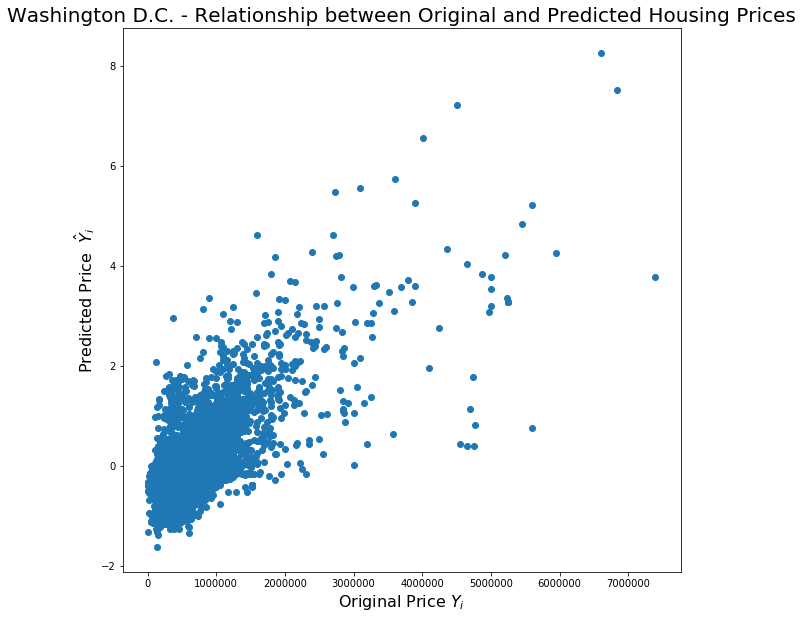

In [64]:
plt.figure(figsize=(10, 10))
plt.scatter(dc_df.price, lm_dc.fittedvalues)
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("Washington D.C. - Relationship between Original and Predicted Housing Prices", fontsize=20)
plt.show()

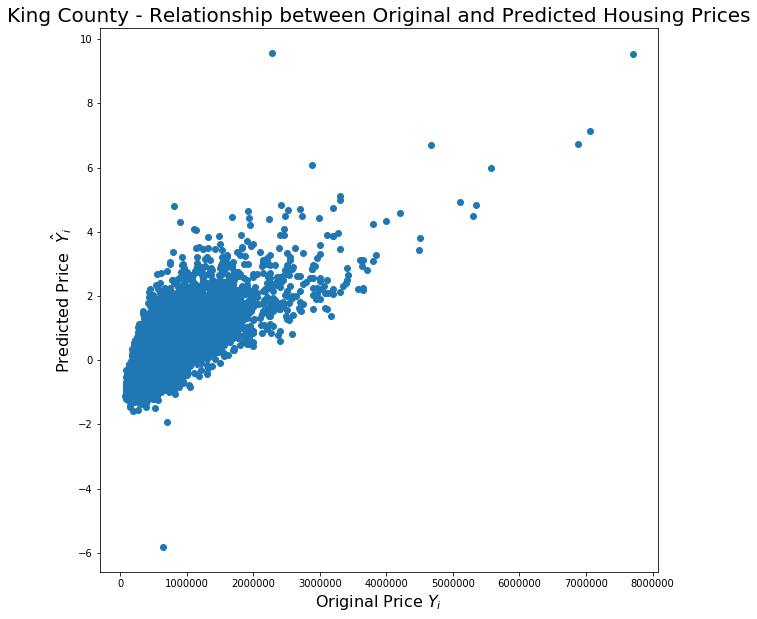

In [65]:
plt.figure(figsize=(10, 10))
plt.scatter(kc_df.price, lm_kc.fittedvalues)
plt.xlabel("Original Price $Y_i$", fontsize = 16)
plt.ylabel("Predicted Price  $\hat{Y}_i$", fontsize = 16)
plt.title("King County - Relationship between Original and Predicted Housing Prices", fontsize=20)
plt.show()

There are a few assumptions that Linear Regression models make:
1. The standard deviation of y = 'price' should be constant for different values of X
2. Normal distribution of errors (test for skew of model)
3. Independence between errors (observations are obtained independently)

## Test for Constant Standard Deviation: Fitted vs. Residual Plot

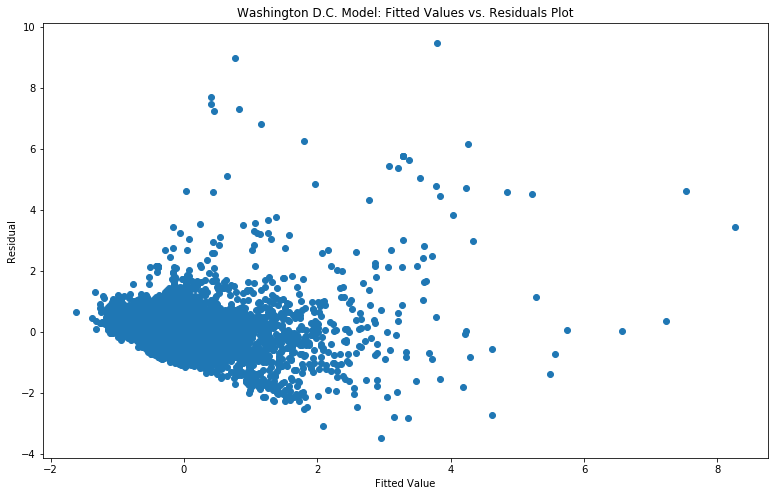

In [66]:
plt.figure(figsize=(13, 8))
plt.scatter(lm_dc.fittedvalues, lm_dc.resid)
plt.title("Washington D.C. Model: Fitted Values vs. Residuals Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

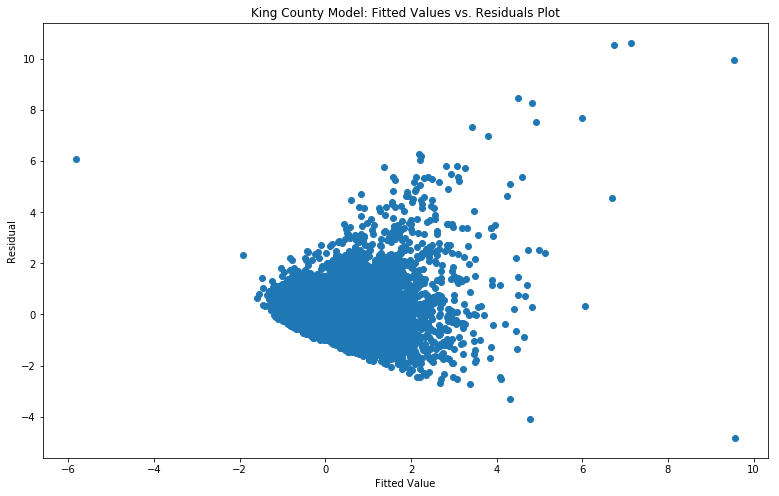

In [67]:
plt.figure(figsize=(13, 8))
plt.scatter(lm_kc.fittedvalues, lm_kc.resid)
plt.title("King County Model: Fitted Values vs. Residuals Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

Because there appears to be a 'fanning' effect in the plot, this implies that the standard deviation is not constant for different values of X. For both models, it seems that my models will need some tuning for the features that I choose.

## Test for Normal Distribution of Errors: Quantile Plots

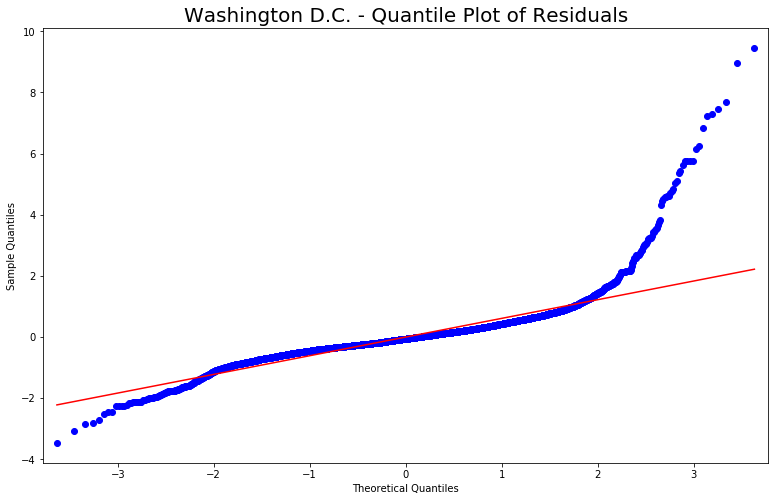

In [68]:
fig = sm.qqplot(lm_dc.resid, line='r')

fig.set_size_inches(13,8)
plt.title("Washington D.C. - Quantile Plot of Residuals", fontsize=20)
plt.show()

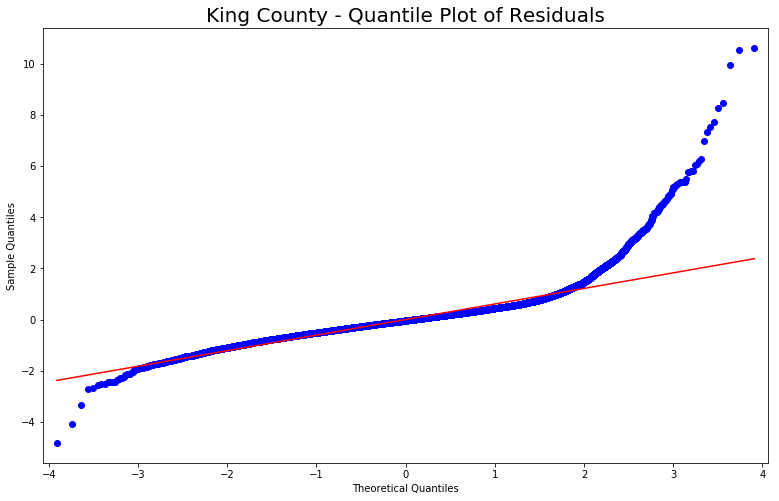

In [69]:
fig = sm.qqplot(lm_kc.resid, line='r')

fig.set_size_inches(13,8)
plt.title("King County - Quantile Plot of Residuals", fontsize=20)
plt.show()

The red line on the plot above signifies a normal distribution of errors. If the errors of each model were normally distributed, they should follow the red line. However, it appears that for both Washington D.C.'s model and King County's model there are clusters of values that deviate from the line, meaning that my model can improve. The points that deviate from the line could be considered outliers and may affect the overall accuracy of each model.

## Test for Outliers: Leverage Plot

It is important to identify high leverage points in each model. Points with high leverage are points that have an extreme predictor value and impact the model's coefficient values. These points are important to distinguish to see if it would be better to exclude them when building the model.

### Washington D.C. Leverage Plot

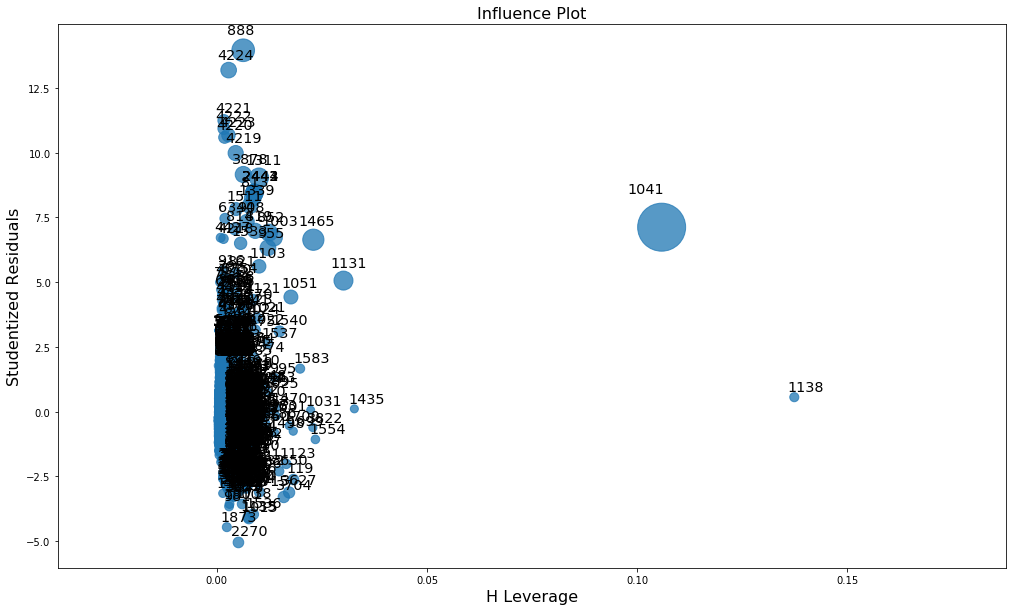

In [70]:
fig = sm.graphics.influence_plot(lm_dc)

fig.set_size_inches(17,10)
plt.show()

In [71]:
dc_df.mean(axis=0)

price           627126.845391
bathrooms            2.167668
bedrooms             2.556564
sqft_living       1715.277034
sqft_lot          1875.414106
floors               2.051103
condition            3.403073
grade                5.949441
yr_built          1946.138408
yr_renovated      1299.470251
month                6.564804
dtype: float64

In [72]:
dchigh_leverage = dc_df.iloc[np.where([1041, 1138])]
dchigh_leverage

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,month
0,993500,5.0,3,1148.0,814,2.0,6,1,1907,2014,10
1,1280000,2.5,3,1630.0,1000,2.0,3,8,1906,2004,8


### King County Leverage Plot

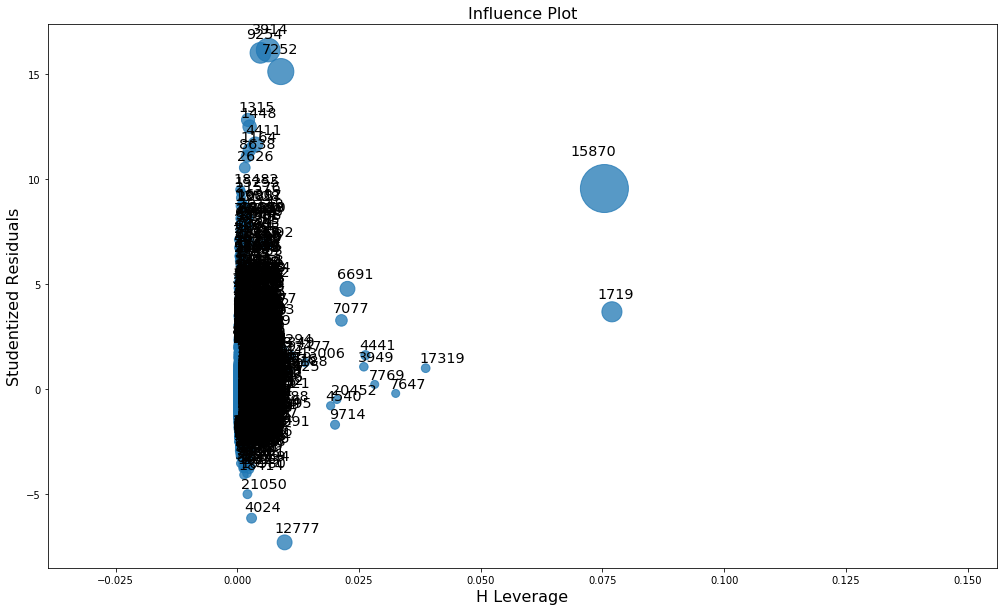

In [73]:
fig = sm.graphics.influence_plot(lm_kc)

fig.set_size_inches(17,10)
plt.show()

In [74]:
kc_df.mean(axis=0)

price           540088.141767
bathrooms            2.114757
bedrooms             3.370842
sqft_living       2079.899736
sqft_lot         15106.967566
floors               1.494309
condition            2.432286
grade                5.084625
yr_built          1971.005136
yr_renovated        84.402258
month                6.574423
dtype: float64

In [75]:
kchigh_leverage = kc_df.iloc[np.where([15870, 1719])]
kchigh_leverage

,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,month
0,221900.0,1.00,3,1180.0,5650,1.0,2,2,1955,0,10
1,538000.0,2.25,3,2570.0,7242,2.0,2,2,1951,1991,12


In [91]:
lst = []
columns = [5,1,4,2,3]
lowest = math.inf

while len(columns) > 0:
    for c in columns:
        if c < lowest:
            lowest = c
    lst.append(lowest)
    columns.remove(lowest)
    lowest = math.inf
print(lst)

[1, 2, 3, 4, 5]


## Feature Selection: Forward Regression

Because my models do not completely fit the assumptions mentioned above, I will perform forward regression on each model to select the features that best describe the data. I will begin by building my model with one feature, selecting the feature with the lowest p-value (the best descriptor). Once this model is built, I will rebuild the model again with this feature and each other feature. The model with the lowest p-value will determine the second feature that I add to the model. I will continue this until I cannot add any other housing features that make the model have a p-value higher than 0.05. 

In [189]:
def forward_regression(df, columns):
    """Fuunction that selects features using forward regression"""
    features = 'price ~ '
    best_model = None
    
    while len(columns) > 0:
        lowest_p = math.inf
        best_feature = None
        
        for c in columns:
            if features == 'price ~ ':
                test_features = features + c
                model = ols(test_features, df).fit()
            else:
                test_features = features + '+' + c
                model = ols(test_features, df).fit()
            if model.pvalues[c] < lowest_p and model.pvalues[c] <= 0.05:
                best_feature = c
                lowest_p = model.pvalues[c]
        if best_feature:
            print(best_feature, lowest_p)
            if features == 'price ~ ':
                features = features + best_feature
            else:
                features = features + ' + ' + best_feature
            best_model = model
            columns.remove(best_feature)
        else:
            return best_model

In [190]:
columns = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'condition', 'grade', 'yr_built', 'yr_renovated', 'month']


dc_forward = forward_regression(dc_df_scaled, columns)

bathrooms 0.0
sqft_living 0.0
grade 1.509945365360685e-17
yr_built 1.3091233637948457e-19
floors 2.1767092839731822e-07
sqft_lot 2.1616437466246225e-08
condition 5.801106983071664e-06
yr_renovated 0.0016863252454744886


In [191]:
dc_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     985.0
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:33:36   Log-Likelihood:                -7499.6
No. Observations:                7160   AIC:                         1.502e+04
Df Residuals:                    7151   BIC:                         1.508e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.123e-13      0.008  -1.38e-11      1.000      -0.016       0.016
bathrooms       0.4047      0.011     35.851      0.000       0.383       0.427
sqft_living     0.3369      0.012     28.202      0.000       0.313       0.360
grade           0.0998      0.010      9.784      0.000       0.080       0.120
yr_built       -0.0789      0.008     -9.288      0.000      -0.096      -0.062
floors          0.0629      0.009      6.771      0.000       0.045       0.081
sqft_lot        0.0707      0.011      6.414      0.000       0.049       0.092
condition       0.0405      0.009      4.538      0.000       0.023       0.058
month          -0.0134      0.008     -1.643      0.100      -0.029       0.003
==============================================================================
Omnibus:                     5422.338   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265020.385
Skew:                           3.162   Prob(JB):                         0.00
Kurtosis:                      32.127   Cond. No.                         2.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""